## K-NN

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from datasets import load_dataset
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection.split import train_test_split 
import matplotlib.pyplot as plt

In [2]:
data = load_dataset("nbtpj/movielens-1m-ratings")["train"].shuffle(seed=10).select(range(200000))
movielens_df = pd.DataFrame(data)
movielens_df = movielens_df[["user_id", "movie_id", "user_rating"]]

Found cached dataset parquet (/Users/jaypark/.cache/huggingface/datasets/nbtpj___parquet/nbtpj--movielens-1m-ratings-b1aa424c884e38a3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

Loading cached shuffled indices for dataset at /Users/jaypark/.cache/huggingface/datasets/nbtpj___parquet/nbtpj--movielens-1m-ratings-b1aa424c884e38a3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-15aa091e090a52af.arrow


In [3]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(movielens_df, reader)
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=10)

In [4]:
algo = KNNBasic()
algo.fit(train_data)

predictions = algo.test(test_data)
rmse = accuracy.rmse(predictions)

rmse

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9819


0.9819362490024204

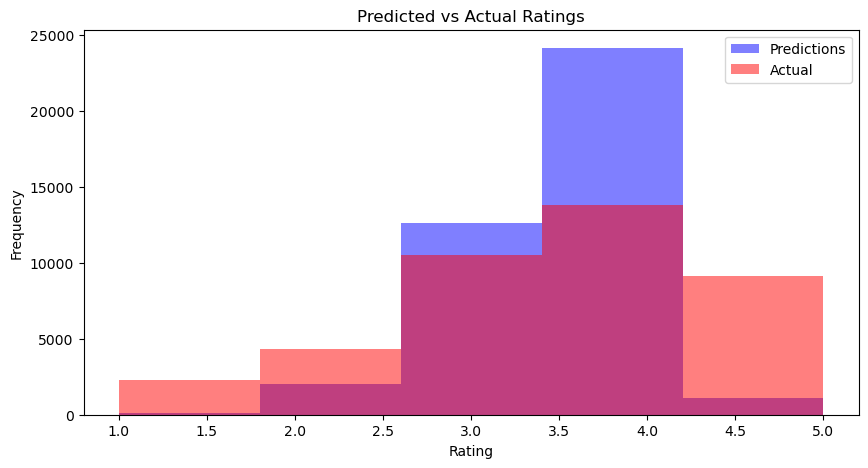

In [5]:
actual_ratings = [pred.r_ui for pred in predictions]
predicted_ratings = [round(pred.est) for pred in predictions]

plt.figure(figsize=(10, 5))
plt.hist(predicted_ratings, bins=5, alpha=0.5, label="Predictions", color="blue")
plt.hist(actual_ratings, bins=5, alpha=0.5, label="Actual", color="red")
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend()
plt.show()